## T-Academy 시계열 데이터 분석

#### Time Series with Pandas

> 시계열 데이터는 시간 데이터를 인덱스로하는 연속된 데이터

> 시간 데이터를 Python의 DateTime 타입으로 바꾸어 Pandas가 제공하는 시계열 데이터 처리 기능 학습

    - DateTime 인덱스
    - Time Resampling
    - Time Shifts
    - Rolling and Expanding

Ref : https://github.com/midnightradio/tsa-tutorial.git

<br>

* Date Time Index
    * time 또는 date 정보는 별개의 컬럼이기보다는 인덱스인 경우가 대다수
    
<br>

* Time Resampling
    * 시계열 데이터의 인덱스는 시,분 등 작은 단위 DateTime 인덱스로 이루어진 경우도 많음
    * 더 넓은 주기로 데이터를 집계(aggregate) 해야하는 경우 Time Resampling이 필요
    * groupby를 사용하기보다는 pandas의 특화된 기능 사용이 편리함
    
<br>

* Time Shifting
    * 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이동시켜야 하는 경우
    
<br>

* Rolling and Expanding
    * 매일 수집한 데이터들에는 노이즈가 포함될 수 있음
    * 이 경우, 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(또는 moving average)을 사용
    * pandas에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균(rolling mean)등을 구할 수 있음
    * 임의 시간 간격의 window를 만들고 그 안에서 mean 같은 통계적 aggregation을 실행
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# datetime
# 시,분,초까지 가능

today = datetime(2019,10,3,13,39)

In [3]:
today

datetime.datetime(2019, 10, 3, 13, 39)

In [4]:
today.day
today.year
today.month

10

In [5]:
dates = [datetime(2019,1,23), datetime(2019,1,24)]
dates

[datetime.datetime(2019, 1, 23, 0, 0), datetime.datetime(2019, 1, 24, 0, 0)]

In [6]:
# dateTime 인덱스로

dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [7]:
# dataFrame으로

data = np.random.randn(2,2)
cols = ['A','B']

df = pd.DataFrame(data=data, index=dt_index, columns=cols)
df

,A,B
2019-01-23,-0.306401,-1.269466
2019-01-24,-0.241146,0.669355


### Resampling

> offset alias> https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 

In [8]:
df = pd.read_csv('./data/apple_stock.csv')

In [9]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [10]:
df.info()

# Date 컬럼이 현재 obj 타입임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [11]:
# DateTime으로 변환

# 1.
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date', inplace=True) # Date를 인덱스로

![offsetalias](https://user-images.githubusercontent.com/35517797/66108168-f49d9c80-e5fc-11e9-9631-83aeea2bec4f.PNG)

In [12]:
# A -> 매년 12월31일 기준
df.resample(rule='A').sum()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916


In [13]:
# 확장
# 특정년도만 
df.resample(rule='A').sum()['2009']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719


In [14]:
# alis customize
# 매해의 12월1일 기준 resampling하기

def first_day(sample):
    return sample[0]

df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964


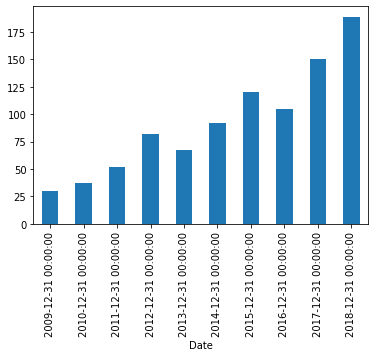

In [15]:
# 종가의 연평균 시각화
df['Close'].resample(rule='A').mean().plot(kind='bar')

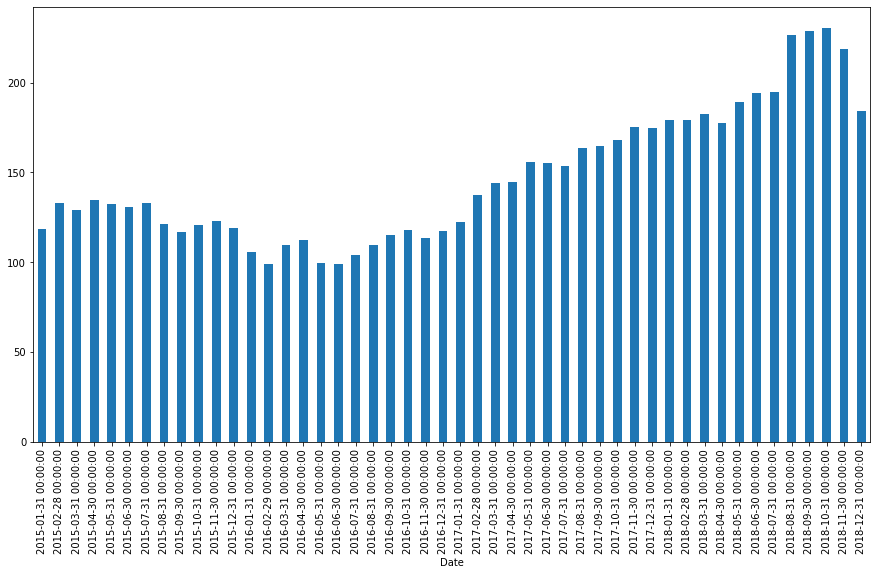

In [16]:
# 월별 open가의 최대값 시각화
# df['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,8))

# 범위제한하기 # 2015년 이후 월별 open가격 최대값 시각화
df['Open']['2015':].resample(rule='M').max().plot(kind='bar', figsize=(15,8))

In [17]:
daily_daterange = pd.date_range(start=datetime(2018,9,1),end=datetime(2019,1,24),freq='B') # freq='B' => 영업일만(주말제외)

daily_dataset = pd.DataFrame({'value' : np.random.rand(len(daily_daterange))},index=daily_daterange)

In [18]:
daily_dataset

,value
2018-09-03,0.729862
2018-09-04,0.570812
2018-09-05,0.500962
2018-09-06,0.699942
2018-09-07,0.366571
...,...
2019-01-18,0.628716
2019-01-21,0.822057
2019-01-22,0.610595
2019-01-23,0.359000


In [19]:
# 해당주의 최소값을 월요일(해당주)에 할당하기
# 'W-MON' => weekly,monthly

daily_dataset.resample(rule='W-MON').min()

,value
2018-09-03,0.729862
2018-09-10,0.366571
2018-09-17,0.288426
2018-09-24,0.006869
2018-10-01,0.270755
2018-10-08,0.000655
2018-10-15,0.076598
2018-10-22,0.143384
2018-10-29,0.061477
2018-11-05,0.144785


In [20]:
# 해당월의 마지막날에ㅡ 해당월의 최소값 할당하기
# 기본적으로 마지막날 선택됨

daily_dataset.resample(rule='M').min()

,value
2018-09-30,0.006869
2018-10-31,0.000655
2018-11-30,0.002726
2018-12-31,0.050081
2019-01-31,0.022746


### Shifting

In [21]:
df = pd.read_csv('./data/apple_stock.csv', index_col='Date')
df.index = pd.to_datetime(df.index)

In [22]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [23]:
# shifting 하기 
# shift(1) 1만큼 이동
# 기존일자는 nan값을 갖게됨 ( -1했을경우에는 아님. 뒤에 데이터가 앞으로)
# 데이터 없어지는 단점.
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


### Rolling

In [24]:
df = pd.read_csv('./data/apple_stock.csv', index_col='Date',parse_dates=['Date'])

In [25]:
## 데이터 불러올시 datetime 형식이 다를경우 변경시켜 불러오기

def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%y-%m-%d")

# df = pd.read_csv('./data/apple_stock.csv',
#                 index_col='Date',
#                 parse_dates=['Date'],
#                 date_parser=dateparser)

In [26]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [27]:
#rolling
#df.rolling(window(period)).aggregation
# 7일간격으로 평균

# ex) 날마다 일주일간의 주가평균 구할경우

df.rolling(7).mean()[:10] # nan발생 이유는 7일간격인데 시작시점에 1-11일 이전 날짜들은 해당일 전까지 7일이 안됨

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


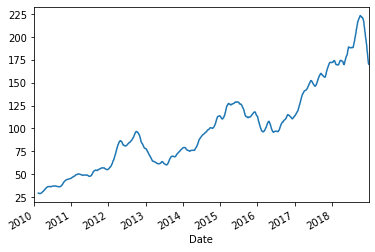

In [28]:
# 오픈가격의 트렌드 관찰하기

df.rolling(window=30).mean()['Close'].plot()

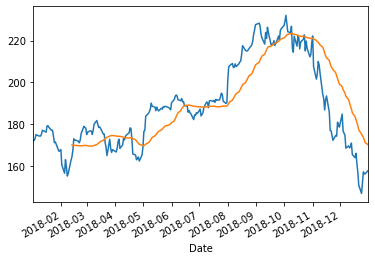

In [29]:
# 원래 open과 트렌드 동시비교
df['Close']['2018'].plot()
df['2018'].rolling(window=30).mean()['Close'].plot()

* 위 그래프 보면 주황색선(트렌드)의 경우 앞의부분이 잘려있음. 이는, window(30)으로 설정하였기 때문에 처음30일간의 평균을 구해진 03월경부터 구해지기 때문

* window사이즈가 커질 수록 실제 트렌드를 반영하지 못할 가능성이 높아질 수 있음 

In [30]:
# 30일의 평균종가 컬럼을 생성

df['Close : 30 Day Mean'] = df['Close'].rolling(30).mean()

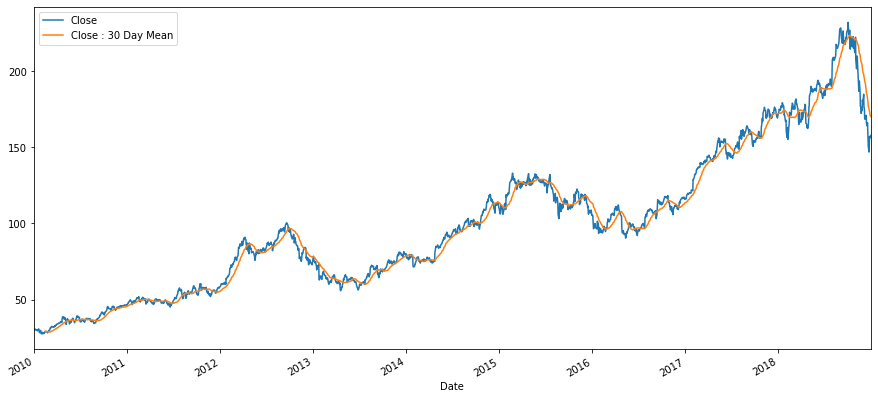

In [31]:
# 종가와 30일종가평균

df[['Close','Close : 30 Day Mean']].plot(figsize=(15,7))

### Expanding

In [32]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

* rolling은 (window=2) 위와같은 리스트에서 앞의 2개를 집계하여 3번째부터 반영되는것이고, expanding은 맨앞에서부터 2개씩 누적하며 집계해줌

<br>

### 실습 <볼린저 밴드>

중간 선 : 20 일 이동 평균 (SMA)

상단 밴드 : 20 일 SMA + (20 일 표준 편차 x2)

하단 밴드 : 20 일 SMA - (20 일 표준 편차 x2)

In [33]:
## 1. 20일 이동평균 

df['Close: 20 Day Mean'] = df['Close'].rolling(window=20).mean()

## 2. 20일 이동평균 + 2*(20일 표준편차)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(window=20).std())
## 3. 20일 이동평균 - 2*(20일 표준편차)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(window=20).std())

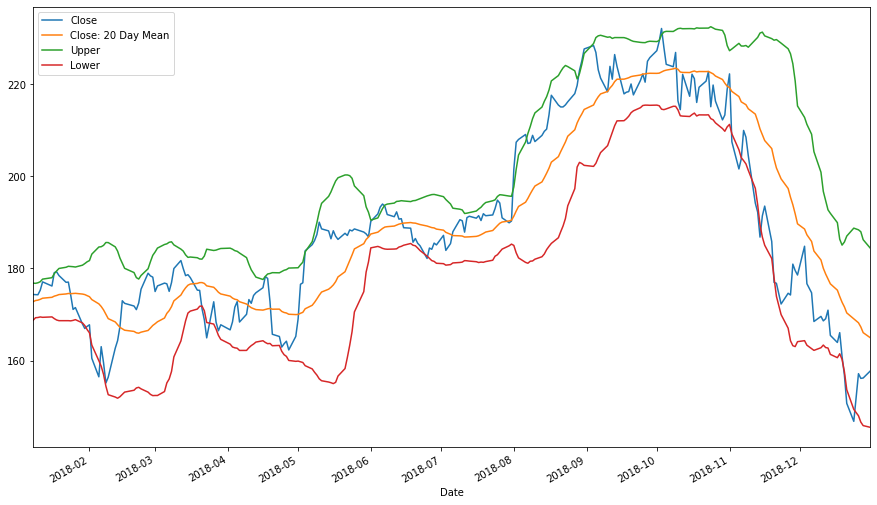

In [34]:
df[2018:][['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(15,9))